# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/sahilsssingh5/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-n8dg0zqb/tensorflow-gpu_0c233b4457964ce9ba692370f89e3205/setup.py'"'"'; __file__='"'"'/tmp/pip-install-n8dg0zqb/tensorflow-gpu_0c233b4457964ce9ba692370f89e3205/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-dj66lxmp
       cwd: /tmp/pip-install-n8dg0zqb/tensorflow-gpu_0c233b4457964ce9ba692370f89e3205/
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-n8dg0zqb/tensorflow-gpu_0c233b4457964ce9ba692370f89e3205/setup.py"

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
aiofiles                      23.2.1
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
back

In [3]:
import tensorflow as tf
import os

2024-04-30 23:35:53.891108: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 23:35:53.942800: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 23:35:54.065087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 23:35:54.065134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 23:35:54.074072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

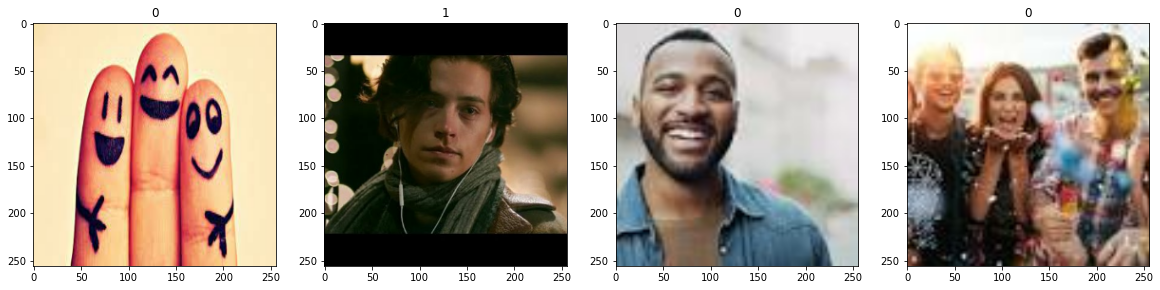

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[4.54901963e-01, 4.07843143e-01, 3.13725501e-01],
          [4.55361515e-01, 4.08302695e-01, 3.14185053e-01],
          [4.58823532e-01, 4.11764711e-01, 3.17647070e-01],
          ...,
          [4.54901963e-01, 4.35294122e-01, 3.21568638e-01],
          [4.54901963e-01, 4.35294122e-01, 3.21568638e-01],
          [4.54901963e-01, 4.35294122e-01, 3.21568638e-01]],
 
         [[4.54901963e-01, 4.07843143e-01, 3.13725501e-01],
          [4.55361515e-01, 4.08302695e-01, 3.14185053e-01],
          [4.58823532e-01, 4.11764711e-01, 3.17647070e-01],
          ...,
          [4.57146138e-01, 4.37538296e-01, 3.23812813e-01],
          [4.57146138e-01, 4.37538296e-01, 3.23812813e-01],
          [4.57146138e-01, 4.37538296e-01, 3.23812813e-01]],
 
         [[4.54901963e-01, 4.07843143e-01, 3.13725501e-01],
          [4.55361515e-01, 4.08302695e-01, 3.14185053e-01],
          [4.58823532e-01, 4.11764711e-01, 3.17647070e-01],
          ...,
          [4.59729552e-01, 4.38309669e-01, 3.2549

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 464ms/step - loss: 0.8215 - accuracy: 0.5402 - val_loss: 0.5958 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 4s 428ms/step - loss: 0.6274 - accuracy: 0.6027 - val_loss: 0.5605 - val_accuracy: 0.9062
Epoch 3/20


2024-04-30 23:37:31.606806: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 435ms/step - loss: 0.5292 - accuracy: 0.8080 - val_loss: 0.3919 - val_accuracy: 0.8906
Epoch 4/20


2024-04-30 23:37:35.709115: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 432ms/step - loss: 0.3820 - accuracy: 0.8527 - val_loss: 0.2759 - val_accuracy: 0.9219
Epoch 5/20


2024-04-30 23:37:39.764930: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 429ms/step - loss: 0.2676 - accuracy: 0.9241 - val_loss: 0.2401 - val_accuracy: 0.9219


2024-04-30 23:37:43.806124: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 6/20
7/7 [==============================] - 4s 433ms/step - loss: 0.2264 - accuracy: 0.9286 - val_loss: 0.1586 - val_accuracy: 0.9688
Epoch 7/20


2024-04-30 23:37:48.935728: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 430ms/step - loss: 0.1522 - accuracy: 0.9554 - val_loss: 0.1098 - val_accuracy: 0.9688
Epoch 8/20


2024-04-30 23:37:53.027176: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 455ms/step - loss: 0.0789 - accuracy: 0.9866 - val_loss: 0.1311 - val_accuracy: 0.9219
Epoch 9/20
7/7 [==============================] - 4s 451ms/step - loss: 0.0642 - accuracy: 0.9821 - val_loss: 0.1761 - val_accuracy: 0.9375
Epoch 10/20
7/7 [==============================] - 4s 446ms/step - loss: 0.0790 - accuracy: 0.9777 - val_loss: 0.0354 - val_accuracy: 0.9844
Epoch 11/20


2024-04-30 23:38:05.584835: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 440ms/step - loss: 0.0497 - accuracy: 0.9955 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 12/20
7/7 [==============================] - 4s 443ms/step - loss: 0.0452 - accuracy: 0.9866 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 13/20
7/7 [==============================] - 4s 439ms/step - loss: 0.0724 - accuracy: 0.9643 - val_loss: 0.0341 - val_accuracy: 0.9844
Epoch 14/20


2024-04-30 23:38:18.028884: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 440ms/step - loss: 0.0316 - accuracy: 0.9955 - val_loss: 0.0462 - val_accuracy: 0.9844
Epoch 15/20


2024-04-30 23:38:22.173931: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 [==============================] - 4s 461ms/step - loss: 0.0455 - accuracy: 0.9866 - val_loss: 0.0321 - val_accuracy: 0.9844
Epoch 16/20
7/7 [==============================] - 4s 486ms/step - loss: 0.0353 - accuracy: 0.9866 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 17/20
7/7 [==============================] - 5s 485ms/step - loss: 0.0226 - accuracy: 0.9911 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 18/20
7/7 [==============================] - 5s 485ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 19/20
7/7 [==============================] - 5s 489ms/step - loss: 0.0133 - accuracy: 0.9911 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 20/20
7/7 [==============================] - 5s 486ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000


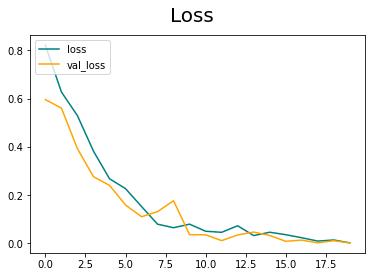

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

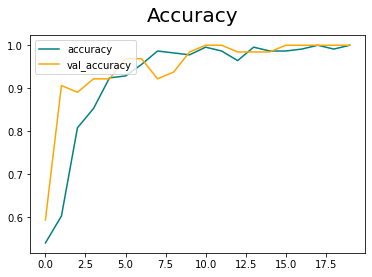

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 93ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [35]:
import cv2

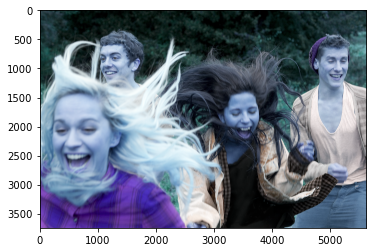

In [36]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

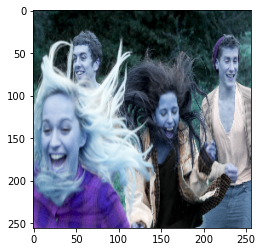

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [39]:
yhat

array([[0.01256356]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

/home/sahilsssingh5/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
